## 1 - Perkenalan

>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama:

Batch:

Problem Statement:  

Objective:

## 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [ ]:
#import library
import pandas as pd
import numpy as np

#import FE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

#import model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
import sklearn
print(sklearn.__version__)

1.5.2


In [3]:
import matplotlib.pyplot as plt

## 3 - Data Loading

>Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [4]:
df = pd.read_csv('heart-attack-possibility.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0


In [5]:
#Duplicate Dataset

df_duplicate = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        298 non-null    float64
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [7]:
#check dataset - 2

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,298.0,0.674497,0.938202,0.0,0.0,0.0,1.0,3.0


In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [11]:
# Remove Whitespace judul column
df.columns = df.columns.str.strip()

In [12]:
# Remove Whitespace semua column
for col in df.columns:
    if df[col].dtype == "object":
        df.loc[:, col] = df[col].str.strip()

## 5 - Feature Engineering

#### Split between X (Features) and y (target)

In [13]:
#Splitting between 'X' and 'y'
X = df.drop(['target'], axis = 1)
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect


### Splitting between Train-Set and Test-set

In [14]:
#Splitting between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (241, 13)
Test Size:  (61, 13)


### Cardinality

In [15]:
obj_col = X_train.select_dtypes(include=['object'])
for cat in obj_col:
  count = len(X_train[cat].unique())
  print(f"Cardinality of column {cat} is {count}")

Cardinality of column sex is 2
Cardinality of column slope is 3
Cardinality of column thal is 4


### Handling Missing Value

In [16]:
# Printing rows where is null
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [17]:
# Check distribution form skewness
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,age,-0.2,normal
1,cp,0.5,normal
2,trestbps,0.6,skewed
3,chol,1.3,skewed
4,fbs,2.0,skewed
5,restecg,0.3,normal
6,thalach,-0.6,skewed
7,exang,0.8,skewed
8,oldpeak,1.4,skewed
9,ca,1.3,skewed


In [18]:
# Import library
from sklearn.impute import SimpleImputer

# Define imputers
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numeric columns
X_train[['ca']] = mode_imputer.fit_transform(X_train[['ca']])
X_test[['ca']] = mode_imputer.transform(X_test[['ca']])

# Apply imputation to categorical columns
X_train[['thal']] = mode_imputer.fit_transform(X_train[['thal']])
X_test[['thal']] = mode_imputer.transform(X_test[['thal']])

In [19]:
# Printing rows where is null (X_train & X_test)
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [20]:
# Printing rows where is null (X_train & X_test)
y_train.isnull().sum()

np.int64(0)

In [21]:
# Printing rows where is null (X_train & X_test)
y_test.isnull().sum()

np.int64(0)

### Handling Outlier

In [22]:
skewness

,nama kolom,nilai skewness,distribution
0,age,-0.2,normal
1,cp,0.5,normal
2,trestbps,0.6,skewed
3,chol,1.3,skewed
4,fbs,2.0,skewed
5,restecg,0.3,normal
6,thalach,-0.6,skewed
7,exang,0.8,skewed
8,oldpeak,1.4,skewed
9,ca,1.3,skewed


In [23]:
# Mendapatkan kolom numerik dari X_train
num_train = X_train._get_numeric_data()

for k, v in num_train.items():
    # Cek skewness untuk menentukan metode yang digunakan
    if -0.5 <= round(v.skew(), 1) <= 0.5:
        # Distribusi normal -> hitung Z-score manual
        mean = v.mean()
        std = v.std()
        threshold = 3  # Threshold untuk outlier Z-score ±3

        # Identifikasi outlier berdasarkan Z-score
        v_outliers = v[(v < mean - threshold * std) | (v > mean + threshold * std)]

        # Batas bawah dan atas berdasarkan Z-score
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
    else:
        # Distribusi tidak normal -> gunakan IQR
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_outliers = v[(v < q1 - 1.5 * iqr) | (v > q3 + 1.5 * iqr)]

        # Batas bawah dan atas berdasarkan IQR
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

    # Hitung persentase outlier
    perc = (len(v_outliers) / len(v)) * 100

    # Tampilkan hasil
    print(f"Column {k} - Lower bound: {round(lower_bound,3)}, Upper bound: {round(upper_bound,3)}, Outliers = {perc:.2f}%")

Column age - Lower bound: 27.602, Upper bound: 81.36, Outliers = 0.00%
Column cp - Lower bound: -2.158, Upper bound: 4.109, Outliers = 0.00%
Column trestbps - Lower bound: 90.0, Upper bound: 170.0, Outliers = 3.32%
Column chol - Lower bound: 114.5, Upper bound: 374.5, Outliers = 2.07%
Column fbs - Lower bound: 0.0, Upper bound: 0.0, Outliers = 14.94%
Column restecg - Lower bound: -1.089, Upper bound: 2.11, Outliers = 0.00%
Column thalach - Lower bound: 92.5, Upper bound: 208.5, Outliers = 1.24%
Column exang - Lower bound: -1.5, Upper bound: 2.5, Outliers = 0.00%
Column oldpeak - Lower bound: -2.4, Upper bound: 4.0, Outliers = 1.66%
Column ca - Lower bound: -1.5, Upper bound: 2.5, Outliers = 7.05%


### Feature Selection

In [24]:
import phik

In [25]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1)

# Show X_train
concat_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
69,62,Female,0,124,209,0,1,163,0,0.0,Upsloping,0.0,Normal,1
118,46,Female,1,105,204,0,1,172,0,0.0,Upsloping,0.0,Normal,1
49,53,Female,0,138,234,0,0,160,0,0.0,Upsloping,0.0,Normal,1
16,58,Female,2,120,340,0,1,172,0,0.0,Upsloping,0.0,Normal,1
54,63,Female,2,135,252,0,0,172,0,0.0,Upsloping,0.0,Normal,1


interval columns not set, guessing: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'target']


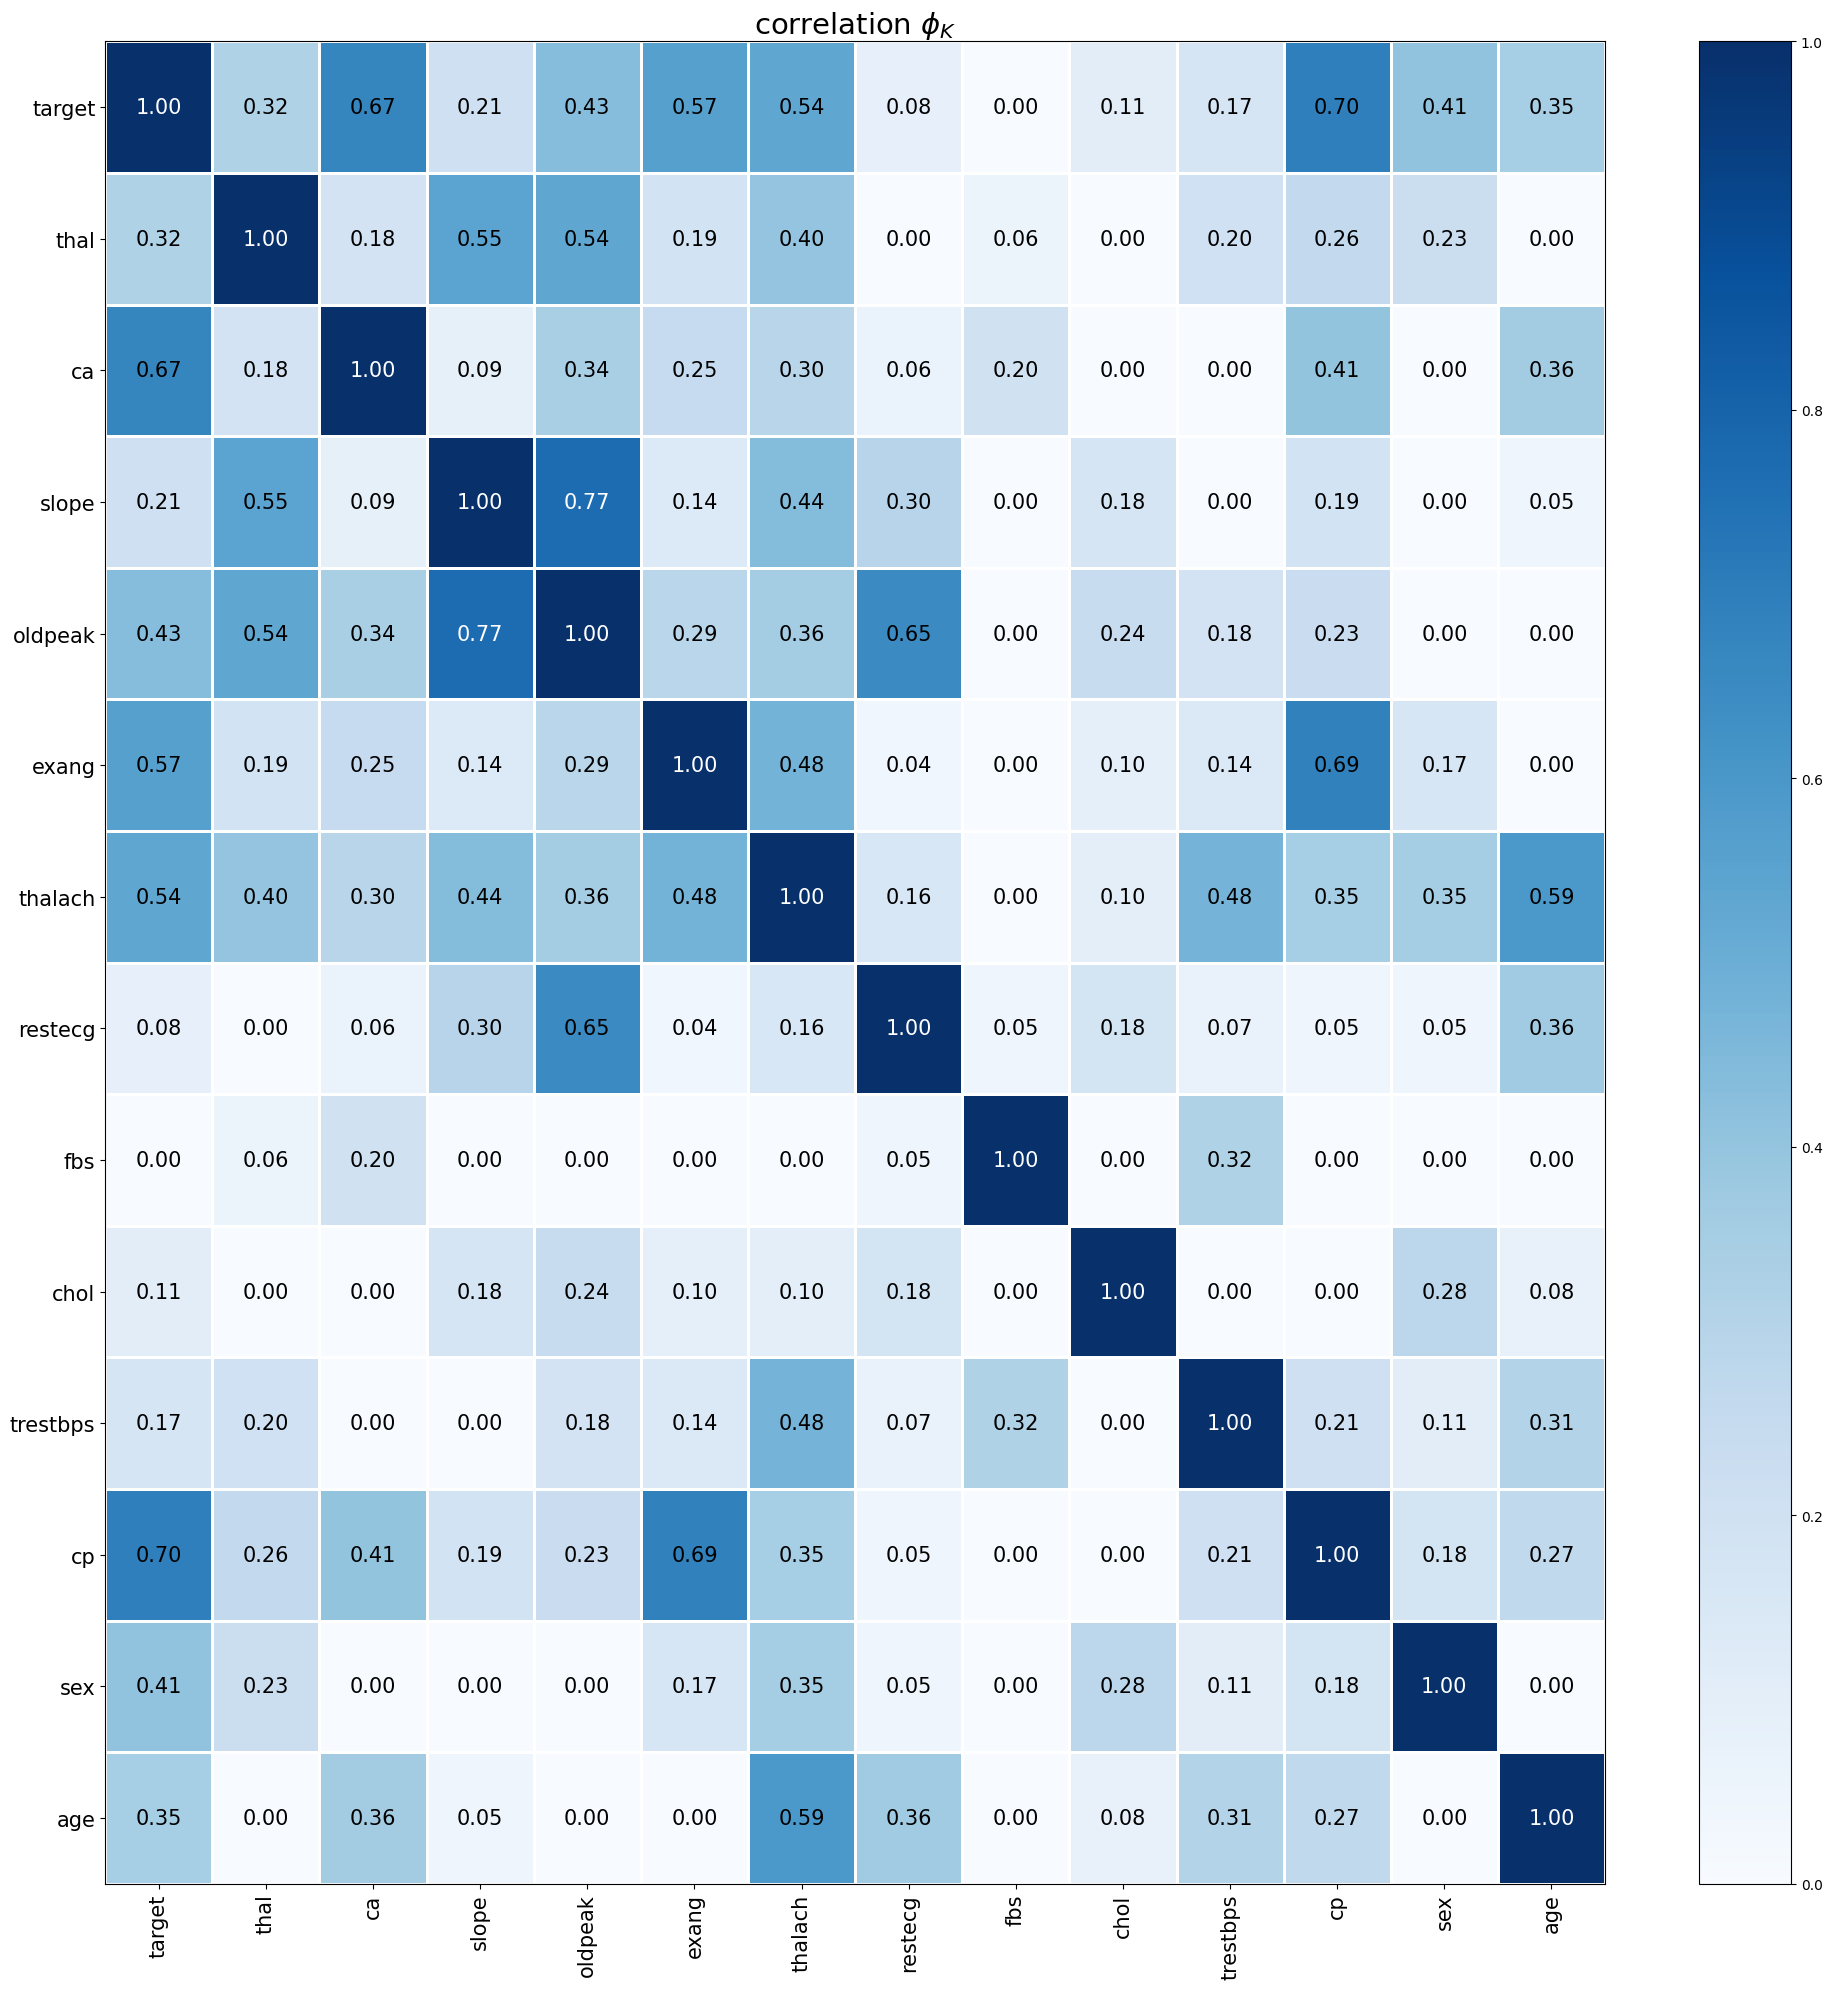

In [26]:
from phik.report import plot_correlation_matrix

# Create function to correlate variables with default
def compute_phik_correlation(dataframe, columns):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix

# Define the list of columns for each subset
columns = ['age','sex','cp','trestbps',
            'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(concat_train, columns)

plot_correlation_matrix(correlation.values, x_labels=correlation.columns, y_labels=correlation.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(20,20))
plt.tight_layout()

In [27]:
#Drop column that < 0.1
X_train.drop(['restecg','fbs'], axis = 1, inplace = True)
X_test.drop(['restecg','fbs'], axis = 1, inplace = True)
X_train

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
69,62,Female,0,124,209,163,0,0.0,Upsloping,0.0,Normal
118,46,Female,1,105,204,172,0,0.0,Upsloping,0.0,Normal
49,53,Female,0,138,234,160,0,0.0,Upsloping,0.0,Normal
16,58,Female,2,120,340,172,0,0.0,Upsloping,0.0,Normal
54,63,Female,2,135,252,172,0,0.0,Upsloping,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...
269,56,Male,0,130,283,103,1,1.6,Downsloping,0.0,Reversible defect
194,60,Male,2,140,185,155,0,3.0,Flat,0.0,Normal
166,67,Male,0,120,229,129,1,2.6,Flat,2.0,Reversible defect
7,44,Male,1,120,263,173,0,0.0,Upsloping,0.0,Reversible defect


In [28]:
# Show columns
print(X_train.columns)
print(X_test.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


### Column Transformer

In [29]:
skewness

,nama kolom,nilai skewness,distribution
0,age,-0.2,normal
1,cp,0.5,normal
2,trestbps,0.6,skewed
3,chol,1.3,skewed
4,fbs,2.0,skewed
5,restecg,0.3,normal
6,thalach,-0.6,skewed
7,exang,0.8,skewed
8,oldpeak,1.4,skewed
9,ca,1.3,skewed


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Making column transformer for preprocessing
transformer = ColumnTransformer([
    ('scaler_norm', StandardScaler(), ['age','cp']),  # StandardScaler untuk kolom age dan cp
    ('scaler_skewed', MinMaxScaler(), ['trestbps','chol','thalach','exang','oldpeak','ca']),  # MinMaxScaler untuk kolom yang lain
    ('encoding_encoder', OneHotEncoder(), ['sex','slope']),  # Menggunakan OneHotEncoder untuk fitur kategorikal
    ('encoding_ordinal', OrdinalEncoder(categories=[['Normal', 'Reversible defect', 'Fixed defect']]), ['thal'])  # OrdinalEncoder untuk kolom thal
], remainder='passthrough')  # Kolom yang tidak disebutkan akan diteruskan tanpa perubahan

### Modelling

In [31]:
#Making pipeline for LogReg
pipe_logreg = Pipeline([
('transformer', transformer),
('classifier', LogisticRegression())
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

#Making pipeline for SVC
pipe_svc = Pipeline([
('transformer', transformer),
('classifier', SVC())
])

# Base Model Evaluation

### **Logistic Regression**

In [32]:
pipe_logreg.fit(X_train, y_train)
print('Training Score: ',round(pipe_logreg.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_logreg.score(X_test, y_test),4))

Training Score:  0.8548
Testing Score:  0.918


In [33]:
y_logreg_pred = pipe_logreg.predict(X_test)
y_logreg_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

target = ['0', '1']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.92      0.94      0.93        35

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



In [35]:
# Cross Validation
f1_train_cross_val = cross_val_score(pipe_logreg,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.8372093  0.86363636 0.79545455]
F1 Score - Mean - Cross Validation :  0.8321000704721634
F1 Score - Std - Cross Validation  :  0.02806858588343459
F1 Score - Range of Test-Set       :  0.8040314845887288 - 0.860168656355598


### **Decision Tree Classifier**

In [36]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.7377


In [37]:
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [38]:
target = ['0', '1']
print(classification_report(y_test, y_dt_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70        26
           1       0.79      0.74      0.76        35

    accuracy                           0.74        61
   macro avg       0.73      0.74      0.73        61
weighted avg       0.74      0.74      0.74        61



In [39]:
#Cross Validation
f1_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.75       0.73563218 0.6835443 ]
F1 Score - Mean - Cross Validation :  0.7230588292351715
F1 Score - Std - Cross Validation  :  0.028550035904685155
F1 Score - Range of Test-Set       :  0.6945087933304863 - 0.7516088651398567


### **Random Forest Classifier**

In [40]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.8689


In [41]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [42]:
target = ['0', '1']
print(classification_report(y_test, y_rf_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.89      0.89      0.89        35

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [43]:
#Cross Validation
f1_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.79545455 0.79569892 0.78571429]
F1 Score - Mean - Cross Validation :  0.7922892519666713
F1 Score - Std - Cross Validation  :  0.004650273556306088
F1 Score - Range of Test-Set       :  0.7876389784103652 - 0.7969395255229774


### **SVC Classifier**

In [44]:
pipe_svc.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.8689


In [45]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [46]:
target = ['0', '1']
print(classification_report(y_test, y_rf_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.89      0.89      0.89        35

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [47]:
#Cross Validation
f1_train_cross_val = cross_val_score(pipe_svc,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.79069767 0.80851064 0.76190476]
F1 Score - Mean - Cross Validation :  0.7870376915404128
F1 Score - Std - Cross Validation  :  0.019201970985534517
F1 Score - Range of Test-Set       :  0.7678357205548783 - 0.8062396625259474


## Base Model Comparison

In [48]:
models = {
    'Logistic Regression' : pipe_logreg,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'SVC' : pipe_svc
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [49]:
df_model

,Logistic Regression,Decision Tree,Random Forest,SVC
Accuracy,0.918033,0.737705,0.868852,0.885246
F1-Score,0.929577,0.764706,0.885714,0.898551


In [50]:
models = {
    'Logistic Regression' : pipe_logreg,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'SVC' : pipe_svc
}

metrics = {
    'Mean' : cross_val_score(models[model], X_train, y_train, cv = 3, scoring='f1').mean(),
    'Std' : cross_val_score(models[model], X_train, y_train, cv = 3, scoring='f1').std()
}

df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

for i in metrics.keys():
  for j in models.keys():
    df_cross_val.loc[i, j] = metrics[i]

In [51]:
df_cross_val

,Logistic Regression,Decision Tree,Random Forest,SVC
Mean,0.787038,0.787038,0.787038,0.787038
Std,0.019202,0.019202,0.019202,0.019202


### COBA COBA / Cross Validation

In [74]:
skfold = StratifiedKFold(n_splits = 5)
cv_log_model = cross_val_score(pipe_logreg, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_svm_model = cross_val_score(pipe_svc, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)

In [75]:
# Finding Best Model based on Cross_Val_Score (mean)
name_model = []
cv_scores = 0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model],
                   ['log_model','svm_model','dt_model','rf_model']):
  print(name)
  print('f1score - All - Cross Validation :', cv)
  print('f1score - Mean - Cross Validation :', cv.mean())
  print('f1score - std - Cross Validation :', cv.std())
  print('f1score - Range of Test Set :', (cv.mean()-cv.std()), '-' , (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cv_scores:
    cv_scores = cv.mean()
    name_model = name
  else:
    pass
print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

log_model
f1score - All - Cross Validation : [0.82352941 0.87272727 0.90909091 0.81481481 0.76923077]
f1score - Mean - Cross Validation : 0.8378786355256944
f1score - std - Cross Validation : 0.04844787924420765
f1score - Range of Test Set : 0.7894307562814867 - 0.8863265147699021
--------------------------------------------------
svm_model
f1score - All - Cross Validation : [0.84615385 0.86792453 0.89285714 0.79245283 0.72      ]
f1score - Mean - Cross Validation : 0.8238776695003109
f1score - std - Cross Validation : 0.06159969530403388
f1score - Range of Test Set : 0.7622779741962771 - 0.8854773648043448
--------------------------------------------------
dt_model
f1score - All - Cross Validation : [0.73469388 0.75       0.83018868 0.76       0.79166667]
f1score - Mean - Cross Validation : 0.7733098446925939
f1score - std - Cross Validation : 0.03401137596943964
f1score - Range of Test Set : 0.7392984687231543 - 0.8073212206620335
--------------------------------------------------
rf

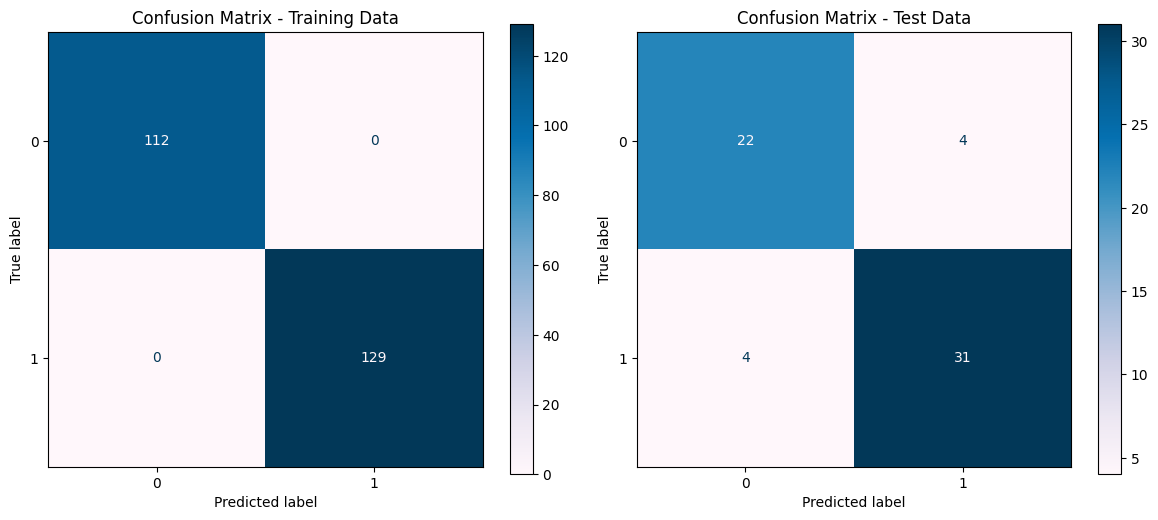

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, recall_score

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(pipe_rf, X_train, y_train, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

In [ ]:
y_pred_train = pipe_logreg.predict(X_train)
y_pred_test = pipe_logreg.predict(X_test)

In [54]:
# Create function to create reports
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # Calculate recall scores
    score_reports = {
        'Recall Train Set': recall_score(y_train, y_pred_train),
        'Recall Test Set': recall_score(y_test, y_pred_test),
    }

    # Calculate confusion matrices for train and test sets
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Extract false negatives from the confusion matrices and add to the report
    score_reports['False Negative Train'] = cm_train[1, 0]
    score_reports['False Negative Test'] = cm_test[1, 0]

    # Store the report in the dictionary with the specified model name
    all_reports[name] = score_reports
    return all_reports

all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Logistic Regresion without Tuning')

pd.DataFrame(all_reports)

,Logistic Regresion without Tuning
Recall Train Set,0.899225
Recall Test Set,0.942857
False Negative Train,13.000000
False Negative Test,2.000000


In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Set up the parameter grid for logistic regresion

param_grid_lr = {
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2', 'l1'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 500],
    'classifier__class_weight': [None, 'balanced']
}

# Set up the GridSearchCV object for Random Forest
grid_search_lr = RandomizedSearchCV(pipe_logreg,
                                    param_distributions=param_grid_lr,
                                    scoring='recall',
                                    cv=5,
                                    verbose=2,
                                    n_jobs=-1)

# Fit GridSearchCV for Random Forest
grid_search_lr.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print('Best hyperparameters for Random Forest:', grid_search_lr.best_params_)

# Best recall for Random Forest
print('Best recall for Random Forest:', grid_search_lr.best_score_)

# Save best Random Forest model to a variable
best_lr_model = grid_search_lr.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for Random Forest: {'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__max_iter': 200, 'classifier__class_weight': None, 'classifier__C': 0.01}
Best recall for Random Forest: 1.0


In [56]:
# Get predictions for training and testing set using the hyperparameter tuned model
y_pred_train_tuned = best_lr_model.predict(X_train)
y_pred_test_tuned = best_lr_model.predict(X_test)

In [60]:
# # Print recall score
# target = ['0', '1']
# print(classification_report(y_test, y_pred_test_tuned, target_names = target))

print('Recall Score - Train Set  : ', recall_score(y_train, y_pred_train_tuned))
print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_tuned))

Recall Score - Train Set  :  1.0
Recall Score - Test Set   :  1.0


In [58]:
# Add results to the report
all_reports = performance_report(all_reports, y_train, y_pred_train_tuned, y_test, y_pred_test_tuned, 'Logistic Regresion with Tuning')
pd.DataFrame(all_reports)

,Logistic Regresion without Tuning,Logistic Regresion with Tuning
Recall Train Set,0.899225,1.0
Recall Test Set,0.942857,1.0
False Negative Train,13.000000,0.0
False Negative Test,2.000000,0.0


## Save model

In [67]:
import pickle
# Save the best model
with open('best_rf_model.pkl', 'wb') as model_file:
  pickle.dump(best_lr_model, model_file)

## Inference

In [68]:
with open('best_rf_model.pkl', 'rb') as file_1:
  model = pickle.load(file_1)

In [71]:
df_inf = {
    'age'	: 57,
'sex'	: 'Female',
'cp'	: 0,
'trestbps'	: 120,
'chol'	: 354,
'fbs' : 0,
'restecg' :  1,
'thalach'	: 163,
'exang': 1,
'oldpeak'	: 0.6,
'slope'	: 'Upsloping',
'ca'	: 0.0,
'thal'	: 'Normal'
}
df_inf = pd.DataFrame([df_inf])
df_inf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal


In [72]:
y_pred_inf = model.predict(df_inf)
y_pred_inf

array([1])